In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

In [0]:
X_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train.p', 'rb'))
y_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_train.p', 'rb'))
X_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test.p', 'rb'))
y_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_test.p', 'rb'))
X_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev.p', 'rb'))
y_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_dev.p', 'rb'))

In [0]:
X_train_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_1.p', 'rb'))
X_test_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_1.p', 'rb'))
X_dev_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_1.p', 'rb'))
X_train_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_2.p', 'rb'))
X_test_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_2.p', 'rb'))
X_dev_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_2.p', 'rb'))
X_train_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_1_0_0.p', 'rb'))
X_test_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_1_0_0.p', 'rb'))
X_dev_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_1_0_0.p', 'rb'))

X_train_arima_1_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_1_0_1.p', 'rb'))
X_test_arima_1_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_1_0_1.p', 'rb'))
X_dev_arima_1_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_1_0_1.p', 'rb'))

Load UKIRT Data

In [0]:
X_CASU_16_11_1_mag = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/UKIRT/X_CASU_16_11_1_mag.pkl', 'rb'))
X_CASU_16_11_1_emag = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/UKIRT/X_CASU_16_11_1_emag.pkl', 'rb'))

In [0]:
X_microlensing_mag = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/UKIRT/X_microlensing_mag.pkl', 'rb'))
X_microlensing_emag = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/UKIRT/X_microlensing_emag.pkl', 'rb'))

In [7]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import itertools
import numpy as np
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

In [0]:
def plot_data(X, y_label=None, y_pred=None, rows=5, cols=4):
    """Plot the light curve and the associated label. Trims zeroes in X"""
    plot=plt.figure(figsize=(rows * 4, 15))
    for i in range(rows * cols):
        plt.subplot(rows,cols,i+1)
        last_nonzero = np.max(np.nonzero(X[i,:,0]))
        plt.plot(X[i,:last_nonzero,0], '#a0a0a0', label='Light Curve')
        if y_label is not None:
            plt.plot(y_label[i,:last_nonzero], 'r', label='Label')
        if y_pred is not None:
            plt.plot(y_pred[i,:last_nonzero], 'b', label='Prediction')
        if i == 0:
            plt.legend()

    return plot


def plot_history(lc):
    plot=plt.figure()
    plt.plot(lc.history['f1_m'], label = 'Training F1')
    plt.plot(lc.history['val_f1_m'], label = 'Validation F1')
    plt.legend()
    return plot


def plot_curve(y_label, y_pred):
    label_cast_flat = list(itertools.chain(*y_label.astype(int)))
    pred_flat = list(itertools.chain(*y_pred))
    precision, recall, threshold = precision_recall_curve(label_cast_flat, pred_flat)
    f1 = 2 * (precision * recall) / (precision + recall)
    plot = plt.figure()
    plt.plot(threshold, precision[1:], label='Precision')
    plt.plot(threshold, recall[1:], label='Recall')
    plt.plot(threshold, f1[1:], label='F1')
    plt.legend()
    print('Best threshold: ', threshold[np.argmax(f1)-1])
    print('Best F1-Score: ', np.max(f1))
    return plot

In [0]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

import tensorflow as tf
from tensorflow.keras import layers

In [0]:
def dev_curve(model, X_dev):
    pred = model.predict_proba(X_dev)
    return plot_curve(y_dev, pred)

In [0]:
import numpy as np
import tensorflow as tf
import random as rn

def reset_seed():
    np.random.seed(42)
    rn.seed(12345)
    tf.random.set_seed(1234)

# GRU 2

In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# GRU double layer

gru_2_2 = tf.keras.Sequential()

# Adding the first layer
gru_2_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 1)))
gru_2_2.add(layers.Dropout(0.2))

gru_2_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2_2.add(layers.Dropout(0.2))


# Output layer
gru_2_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 200)         121800    
_________________________________________________________________
dropout (Dropout)            (None, None, 200)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           101       
Total params: 212,501
Trainable params: 212,501
Non-trainable params: 0
_________________________________________________________________


In [14]:
reset_seed()
lc_gru_2_2=gru_2_2.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=1, workers=4)

Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 13s 26ms/sample - loss: 0.3440 - acc: 0.9378 - f1_m: 0.2351 - val_loss: 0.1088 - val_acc: 0.9642 - val_f1_m: 0.7021
Epoch 2/50
500/500 [==============================] - 5s 10ms/sample - loss: 0.0815 - acc: 0.9689 - f1_m: 0.5498 - val_loss: 0.0727 - val_acc: 0.9715 - val_f1_m: 0.6003
Epoch 3/50
500/500 [==============================] - 5s 10ms/sample - loss: 0.0655 - acc: 0.9720 - f1_m: 0.6202 - val_loss: 0.0735 - val_acc: 0.9688 - val_f1_m: 0.7240
Epoch 4/50
500/500 [==============================] - 5s 10ms/sample - loss: 0.0631 - acc: 0.9722 - f1_m: 0.6235 - val_loss: 0.0680 - val_acc: 0.9707 - val_f1_m: 0.7191
Epoch 5/50
500/500 [==============================] - 5s 10ms/sample - loss: 0.0607 - acc: 0.9725 - f1_m: 0.6251 - val_loss: 0.0686 - val_acc: 0.9694 - val_f1_m: 0.7262
Epoch 6/50
500/500 [==============================] - 5s 10ms/sample - loss: 0.0601 - acc: 0.9729 - f1_m: 0.

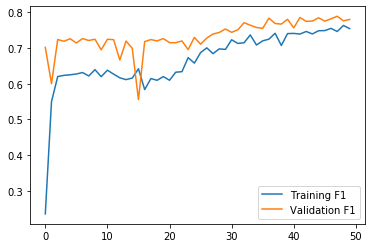

In [15]:
plot=plot_history(lc_gru_2_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/t2_lc.svg')
plot.show()

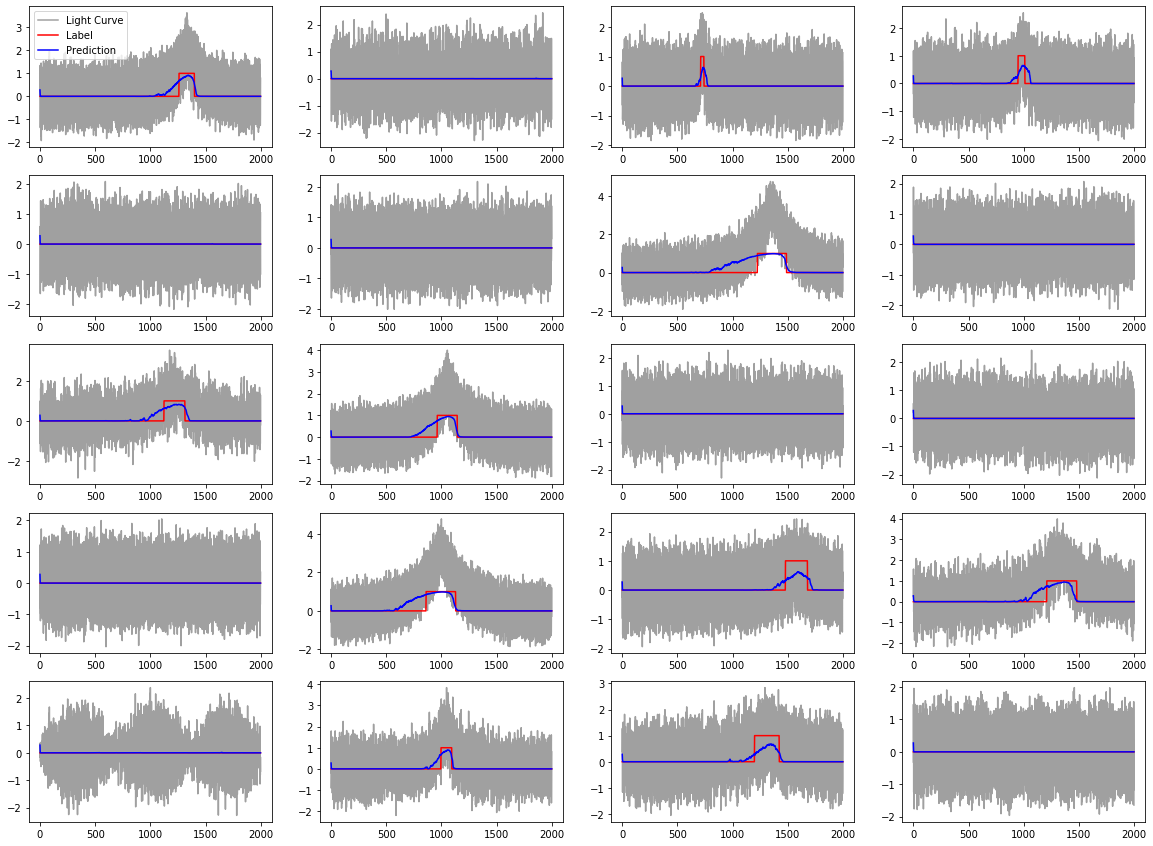

In [16]:
plot=plot_data(X_dev,y_dev,gru_2_2.predict_proba(X_dev))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/t2_val.sample.svg')
plot.show()

In [17]:
gru_2_2.predict_proba(X_CASU_16_11_1_mag).shape

(31770, 162, 1)

In [0]:
y_pred = gru_2_2.predict_proba(X_CASU_16_11_1_mag)

In [66]:
np.max(y_pred[:,20:,:], axis = 1)[-5:]

array([[0.00234202],
       [0.03029117],
       [0.00022918],
       [0.01647565],
       [0.00373286]], dtype=float32)

In [53]:
np.argmax(np.max(y_pred[:,:5,:], axis = 1))

8597

In [0]:
idx = np.squeeze(np.max(y_pred[:,:5,:], axis = 1)).argsort()[-5:]

In [55]:
idx

array([ 9664, 28906, 23401,  8597, 15773])

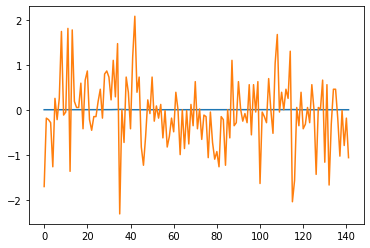

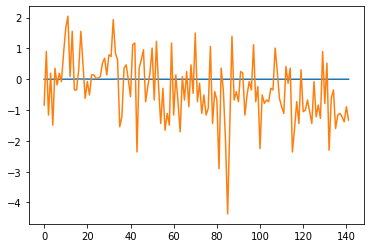

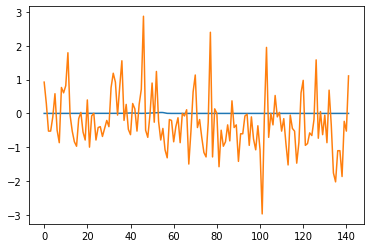

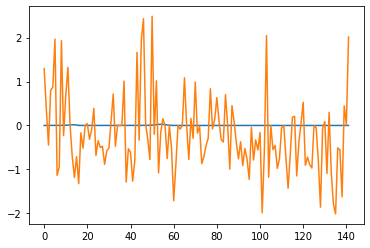

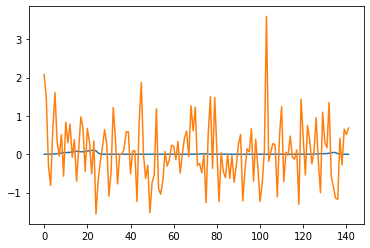

In [67]:
for i in range(len(idx)):
  plt.plot(y_pred[i,20:,:])
  plt.plot(X_CASU_16_11_1_mag[i,20:,:])
  plt.show()

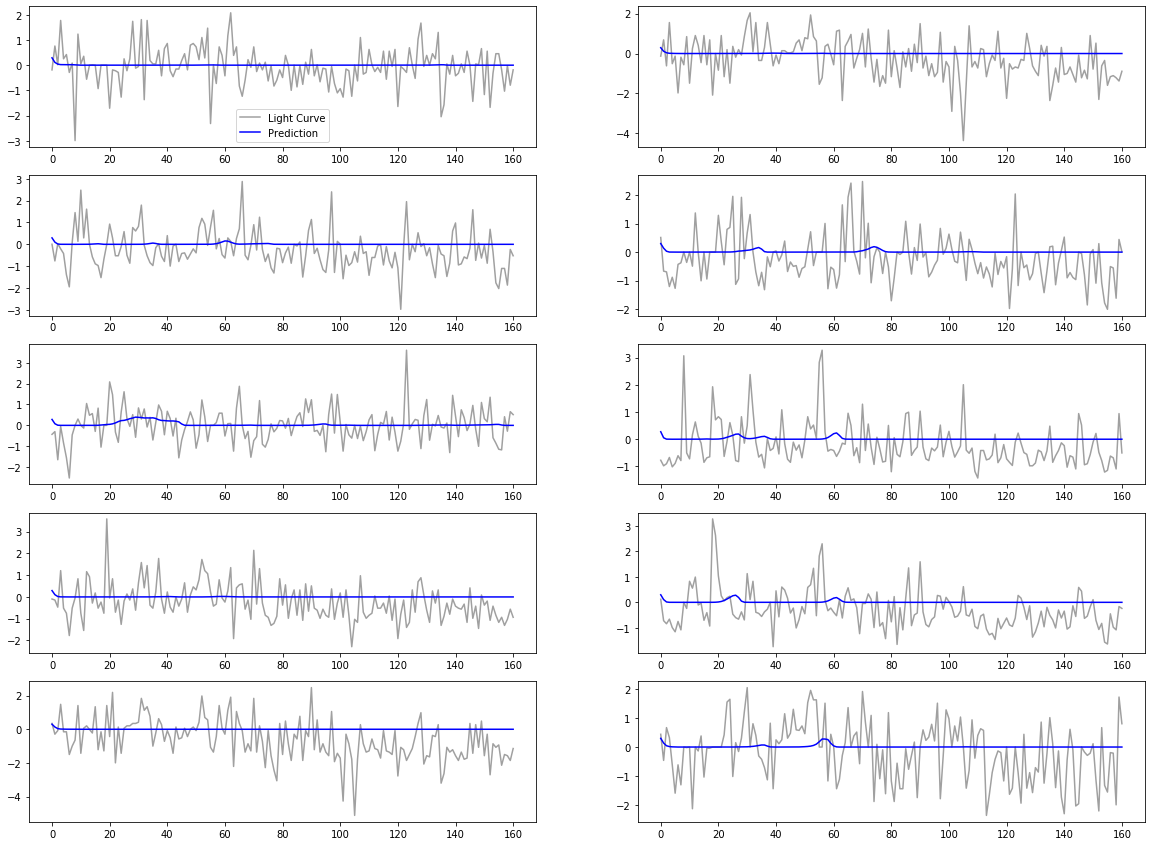

In [0]:
plot=plot_data(X_CASU_16_11_1_mag, y_pred=gru_2_2.predict_proba(X_CASU_16_11_1_mag), cols=2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/t2_to_real.svg')
plot.show()

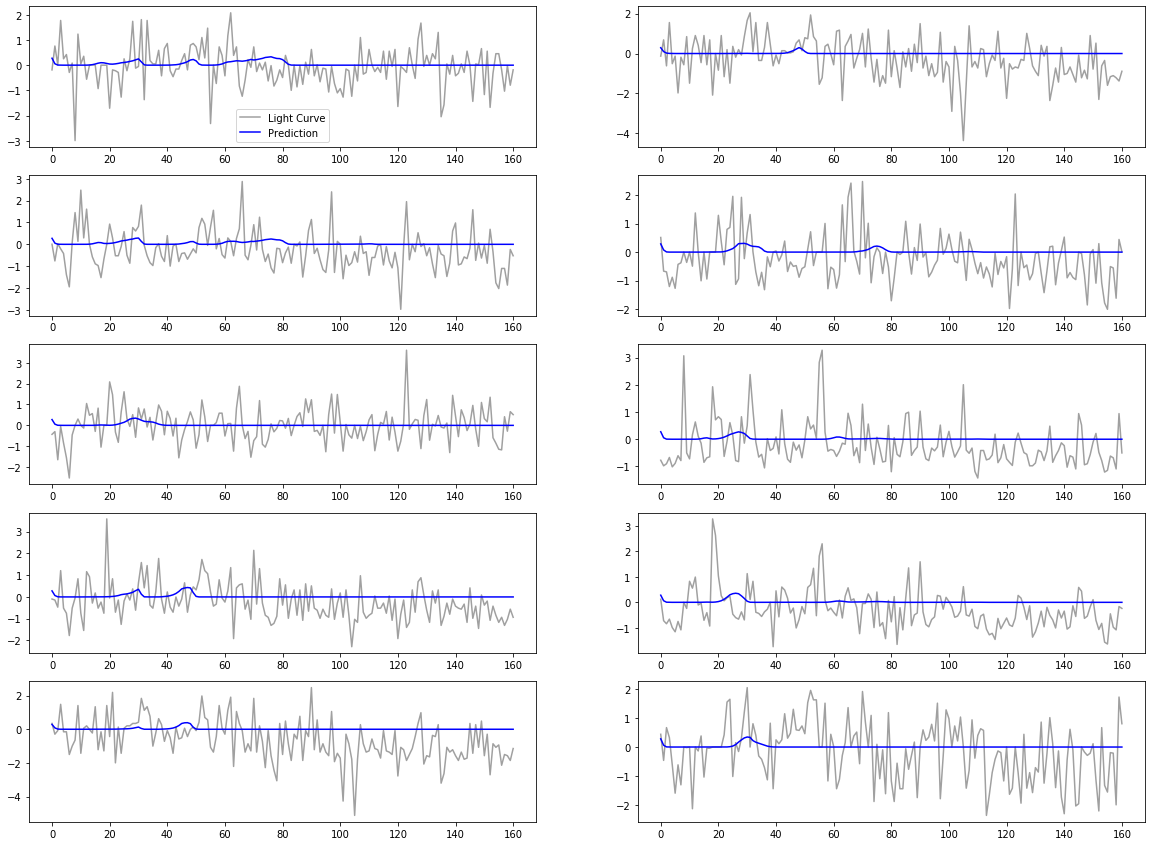

In [0]:
plot=plot_data(X_CASU_16_11_1_mag, y_pred=gru_2_2.predict_proba(X_CASU_16_11_1_emag), cols=2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/t2_to_real.svg')
plot.show()

In [0]:
import numpy as np
np.max(np.nonzero([-2, -2, 0, 0, 0, 0, 0])), np.min(np.nonzero([-2, -2, 0, 0, 0, 0, 0]))

(1, 0)

In [0]:
def truncate(data):
  # left = np.min(np.nonzero(data))
  left = 0
  right = np.max(np.nonzero(data))
  return data[left:right+1,:]

t = truncate(X_microlensing_mag[0])
t = t[np.newaxis,:,:]

In [0]:
t.shape

(1, 139, 1)

NameError: ignored

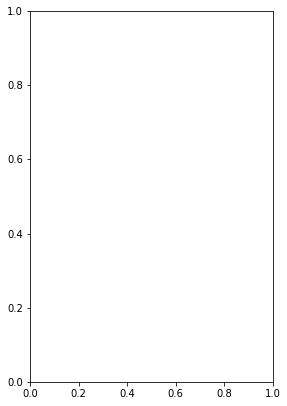

In [0]:
plt.figure(figsize=(20,15))
for i in range(len(X_microlensing_mag)):
  plt.subplot(2,4,i+1)
  plt.plot(truncate(X_microlensing_mag[i]))
plt.show()


In [0]:
X_microlensing_mag[0].shape

(1244, 1)

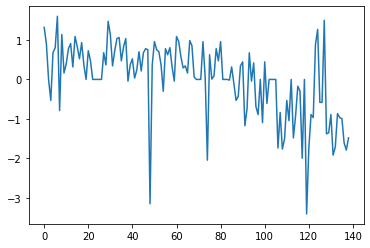

In [0]:
plt.plot(t)

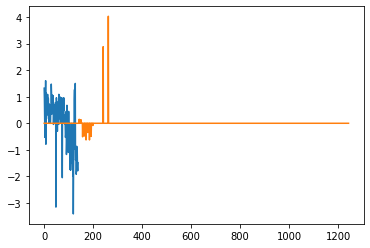

In [0]:
plt.plot(t)
plt.plot(X_microlensing_mag[5])

In [0]:
t.shape

(139, 1)

In [0]:
t[np.newaxis,:,:].shape

(1, 139, 1)

ValueError: ignored

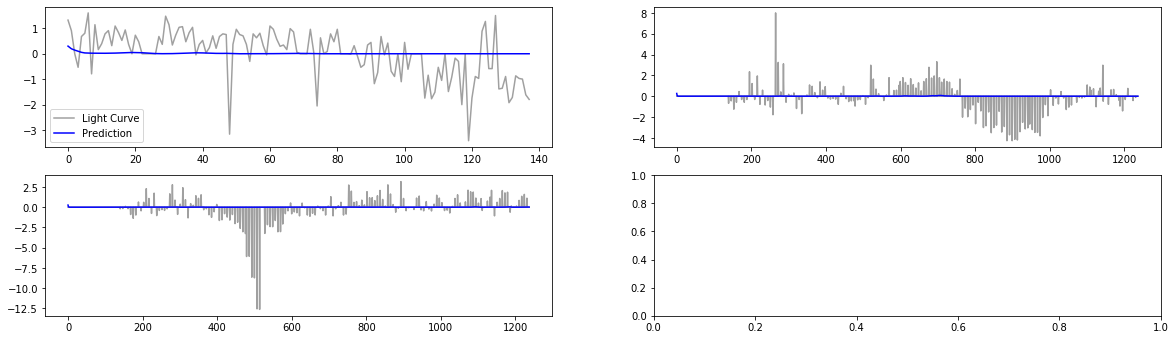

In [0]:
plot=plot_data(X_microlensing_mag, y_pred=gru_2_2.predict_proba(X_microlensing_mag), cols=2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/t2_to_real.svg')
plot.show()

ValueError: ignored

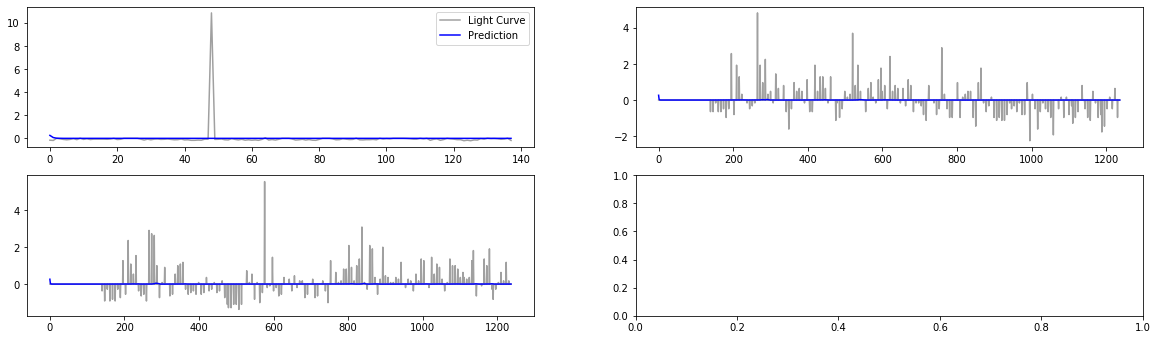

In [0]:
plot=plot_data(X_microlensing_emag, y_pred=gru_2_2.predict_proba(X_microlensing_emag), cols=2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/t2_to_real.svg')
plot.show()

# GRU 2 ARIMA (0,0,2) (non-residual)

In [0]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 200)         122400    
_________________________________________________________________
dropout (Dropout)            (None, None, 200)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
# X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_1), axis=2)
# X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_1), axis=2)
# X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_1), axis=2)

X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_2), axis=2)
X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_2), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_2), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [0]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 8s 17ms/sample - loss: 0.3674 - acc: 0.9213 - f1_m: 0.2268 - val_loss: 0.1500 - val_acc: 0.9577 - val_f1_m: 0.6822
Epoch 2/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0960 - acc: 0.9680 - f1_m: 0.5539 - val_loss: 0.0892 - val_acc: 0.9701 - val_f1_m: 0.7331
Epoch 3/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0722 - acc: 0.9729 - f1_m: 0.6206 - val_loss: 0.0752 - val_acc: 0.9699 - val_f1_m: 0.7284
Epoch 4/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0662 - acc: 0.9714 - f1_m: 0.6223 - val_loss: 0.0695 - val_acc: 0.9713 - val_f1_m: 0.7093
Epoch 5/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0623 - acc: 0.9725 - f1_m: 0.6168 - val_loss: 0.0700 - val_acc: 0.9700 - val_f1_m: 0.7255
Epoch 6/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0616 - acc: 0.9730 - f1_m: 0.6182 -

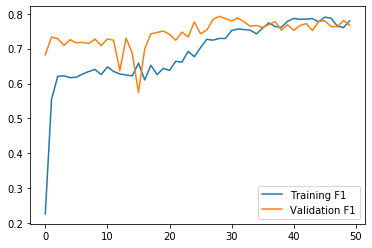

In [0]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_0_0_2.svg')
plot.show()

Best threshold:  0.291164
Best F1-Score:  0.7666313661307403


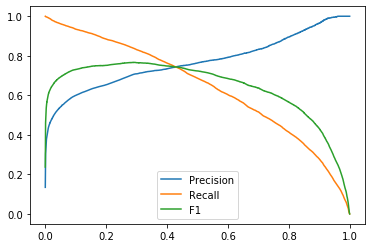

In [0]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_2.svg')
plot.show()

In [0]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05288326352834702, 0.97499496, 0.5827828]

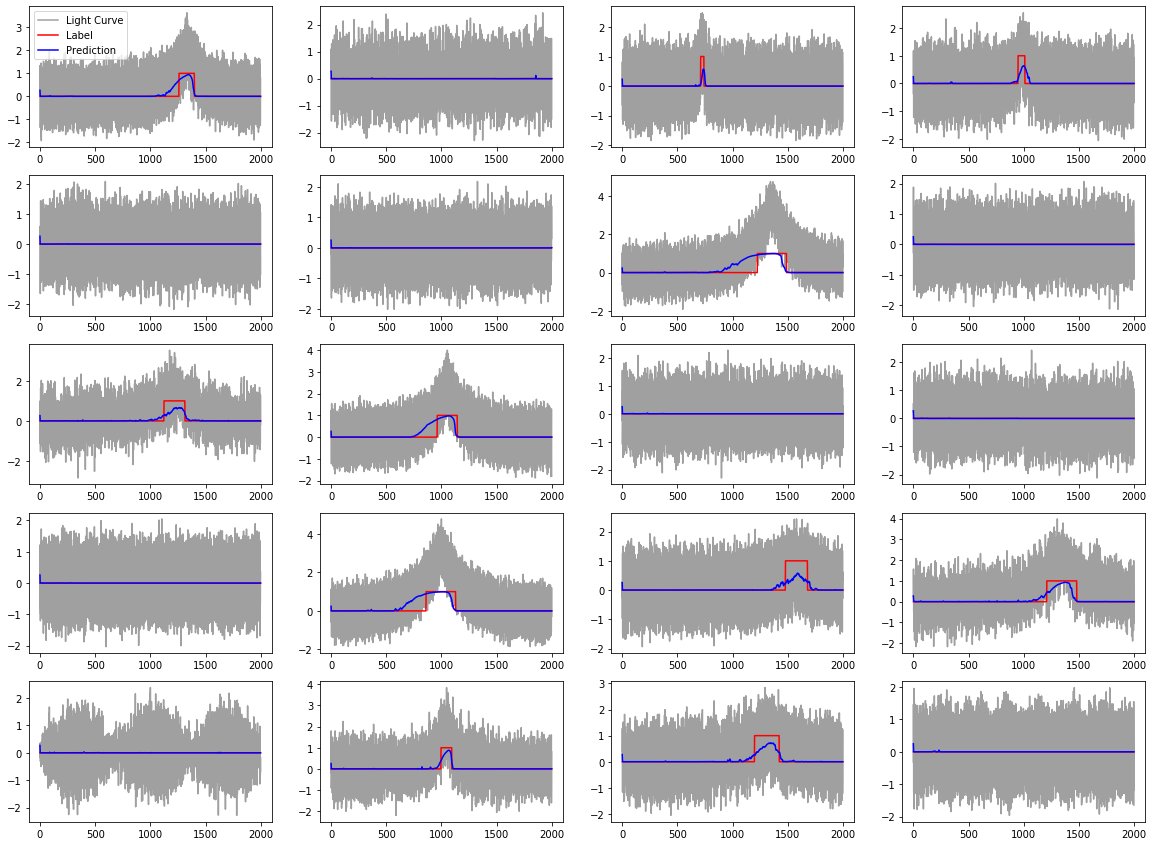

In [0]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_2_example.svg')
plot.show()

In [0]:
plot=plot_data(X_CASU_16_11_1_mag, y_dev, gru_2.predict_proba(X_CASU_16_11_1_mag))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_2_example.svg')
plot.show()

ValueError: ignored